In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

In [5]:
import pingouin as pg # 부분상관을 위한 라이브러리

In [6]:
## the example from the video

# raw correlations
rmg = .7
rsg = .8
rms = .9

# partial correlations
rho_mg_s = (rmg - rsg*rms) / (np.sqrt(1-rsg**2)*np.sqrt(1-rms**2))
rho_sg_m = (rsg - rmg*rms) / (np.sqrt(1-rmg**2)*np.sqrt(1-rms**2))

print(rho_mg_s)
print(rho_sg_m)

-0.07647191129018778
0.5461186812727504


In [12]:
## now for datasets

N = 76

# correlated datasets
x1 = np.linspace(1,10,N) + np.random.randn(N)
x2 = x1+np.random.randn(N)
x3 = x1+np.random.randn(N)

# let's convert theses data to a pandas frame
df = pd.DataFrame()
df['x1'] = x1
df['x2'] = x2
df['x3'] = x3

# compute the 'raw' correlation matrix
cormatR = df.corr()
print(cormatR)

# print out one value
print('  ')
print(cormatR.values[1,0])

# partial correlation # covar = 우리가 제거하려는 변수
# x1, x2 사이의 부분 상관관계를 계산하고 있으며, x3과의 공유된 분산을 제거하고 있음
pc = pg.partial_corr(df,x='x1',y='x2',covar='x3')
pc = pg.partial_corr(df,x='x3',y='x2',covar='x1')
print(' ')
print(pc)

          x1        x2        x3
x1  1.000000  0.941551  0.950439
x2  0.941551  1.000000  0.906446
x3  0.950439  0.906446  1.000000
  
0.9415512501939381
 
          n         r          CI95%     p-val
pearson  76  0.110357  [-0.12, 0.33]  0.345912


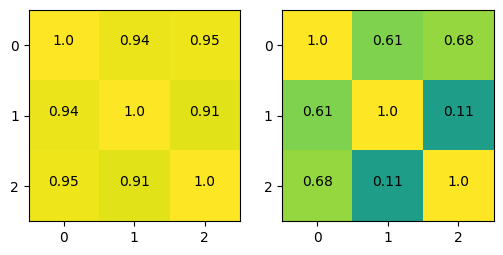

In [15]:
# visualize the matrices

fig,ax = plt.subplots(1,2,figsize=(6,3))

# raw correlations
ax[0].imshow(cormatR.values,vmin=-1,vmax=1)
ax[0].set_xticks(range(3))
ax[0].set_yticks(range(3))

# add text
for i in range(3):
    for j in range(3):
        ax[0].text(i,j,np.round(cormatR.values[i,j],2), horizontalalignment= 'center')


# partial correlations
partialCorMat = df.pcorr()
ax[1].imshow(partialCorMat.values,vmin=-1,vmax=1)
ax[1].set_xticks(range(3))
ax[1].set_yticks(range(3))

# 3번째 변수에 기인하는 분산을 제거했을때
for i in range(3):
    for j in range(3):
        ax[1].text(i,j,np.round(partialCorMat.values[i,j],2), horizontalalignment= 'center')

plt.show()

# 만약, x3를 독립적인 데이터 변경한다면 상관고 부분상관이 거의 비슷함을 관찰할 수 있는데, 이는 x3가 다른 변수들과 공유된 분산이 없기 때문에
# 제거한다 해도 큰 차이가 나지 않는다.